In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import requests
from bs4 import BeautifulSoup, Comment
from tqdm import tqdm
import pandas as pd
from sports_ref.transform import filter_df, merge_with_prev_year
from sports_ref.basketball_ref import get_advanced_stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
all_df = get_advanced_stats(2000, 2019)

100%|██████████| 19/19 [00:37<00:00,  1.95s/it]


In [4]:
all_df = filter_df(all_df)

In [6]:
merged_df = merge_with_prev_year(all_df, 1)

In [7]:
merged_df['bpm'] = merged_df['bpm'].astype(float)
merged_df['bpm___1'] = merged_df['bpm___1'].astype(float)
merged_df['mp'] = merged_df['mp'].astype(float)
merged_df['mp___1'] = merged_df['mp___1'].astype(float)

In [8]:
merged_df['diff'] = merged_df['bpm'] - merged_df['bpm___1']

In [9]:
merged_df['mp_avg'] = 2 / (1/ merged_df['mp'] + 1/merged_df['mp___1'])

In [10]:
def _calc_delta(df):
    df = df.dropna(subset=['mp_avg', 'diff'])
    return (df['diff'] * df['mp_avg']).sum() / df['mp_avg'].sum()

In [11]:
age = merged_df.groupby('age').apply(_calc_delta)

/Users/harrisonchase/workplace/sports_ref_scraper/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


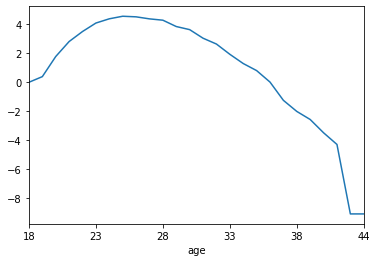

In [12]:
age.fillna(0).cumsum().plot()